In [1]:
from google.colab import files
uploaded = files.upload()


Saving smoke_detection_iot.csv to smoke_detection_iot.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.mixture import GaussianMixture as gmm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

#keep the data file in the same folder as this file
df=pd.read_csv("smoke_detection_iot.csv")
df


,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


In [ ]:
#keep the data file in the same folder as this file
df=pd.read_csv("smoke_detection_iot.csv")
df

"""Understanding the data"""

df.head()

df.tail()

df.shape

df.describe()

df.columns

df.nunique()

,0
Unnamed: 0,62630
UTC,62630
Temperature[C],21672
Humidity[%],3890
TVOC[ppb],1966
eCO2[ppm],1713
Raw H2,1830
Raw Ethanol,2659
Pressure[hPa],2213
PM1.0,1337


In [ ]:
"""Cleaning the data"""

df.isnull().sum()



X=df.drop(["Fire Alarm","Unnamed: 0","UTC"],axis=1)
Y=df["Fire Alarm"]

X

Y

,Fire Alarm
0,0
1,0
2,0
3,0
4,0
...,...
62625,0
62626,0
62627,0
62628,0


,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],NC2.5,CNT,Fire Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.000,0,0
1,20.015,56.67,0,400,12345,18651,939.744,0.000,1,0
2,20.029,55.96,0,400,12374,18764,939.738,0.000,2,0
3,20.044,55.28,0,400,12390,18849,939.736,0.000,3,0
4,20.059,54.69,0,400,12403,18921,939.744,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...
62625,18.438,15.79,625,400,13723,20569,936.670,0.015,5739,0
62626,18.653,15.87,612,400,13731,20588,936.678,0.015,5740,0
62627,18.867,15.84,627,400,13725,20582,936.687,0.014,5741,0
62628,19.083,16.04,638,400,13712,20566,936.680,0.014,5742,0


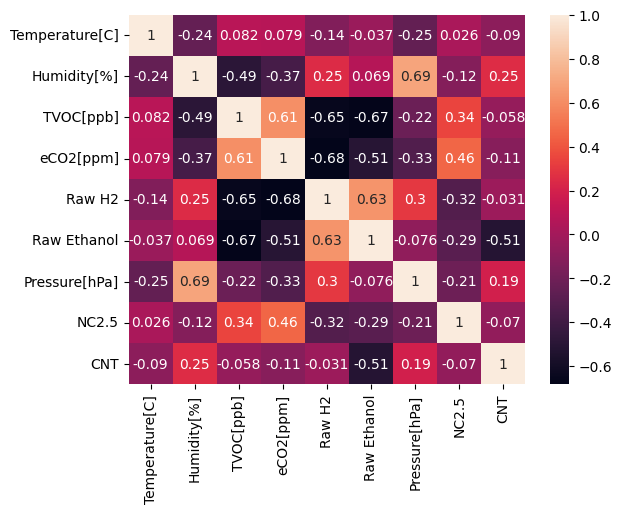

In [ ]:
"""Relationship Analysis"""

correlation=X.corr()
correlation

redundant=pd.DataFrame()
Xupdated=X.copy()
for i in Xupdated.columns:
    for j in Xupdated.columns:
        c=X[i].corr(X[j])
        if(c>0.7 and c<1):
            redundant[i]=X[i]
            if(i in Xupdated.columns):
                Xupdated=Xupdated.drop([i],axis=1)
redundant

Xupdated

correlation1=Xupdated.corr()
correlation1

sns.heatmap(correlation1,xticklabels=correlation1.columns,yticklabels=correlation1.columns,annot=True)

newdf=pd.concat([Xupdated,Y], axis=1, join='inner')
newdf

In [ ]:
print(newdf.columns)

Index(['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]', 'Raw H2',
       'Raw Ethanol', 'Pressure[hPa]', 'NC2.5', 'CNT', 'Fire Alarm'],
      dtype='object')


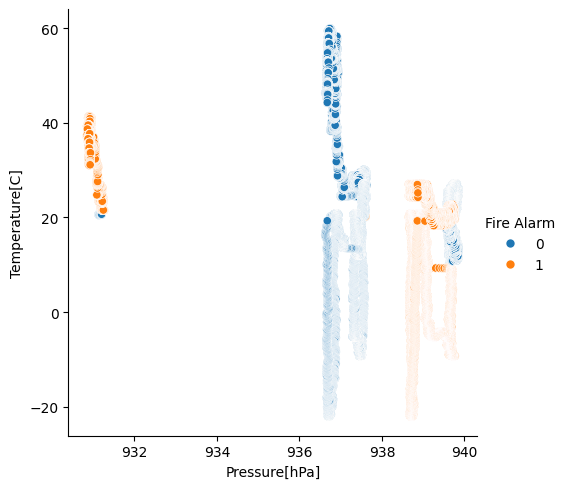

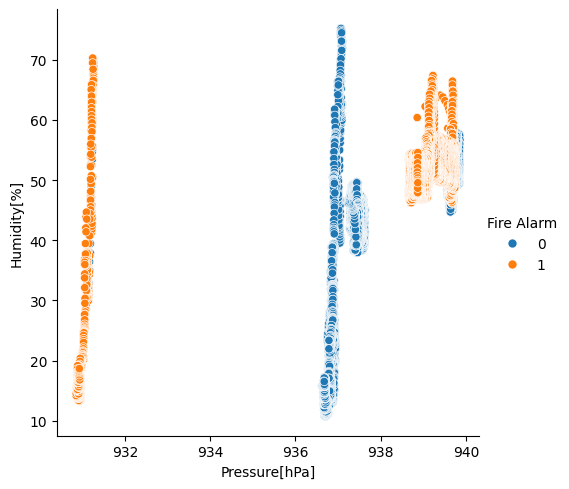

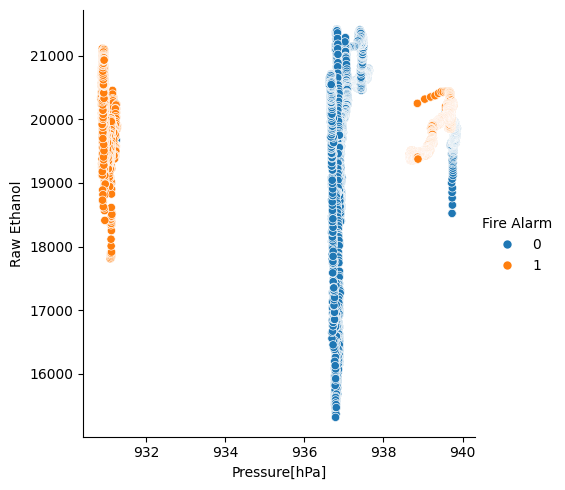

In [ ]:
# plots of pressure against some other quantities were making some sense of clustering, thus further exploring them
sns.relplot(x="Pressure[hPa]", y="Temperature[C]", hue="Fire Alarm", data=newdf)
sns.relplot(x="Pressure[hPa]", y="Humidity[%]", hue="Fire Alarm", data=newdf)
sns.relplot(x="Pressure[hPa]",y="Raw Ethanol",hue="Fire Alarm",data=newdf)


In [ ]:
"""Applying Normalisation"""

ss=StandardScaler()
standard_data=ss.fit_transform(Xupdated)

mm=MinMaxScaler()
normalised_data=mm.fit_transform(Xupdated)

standard_data

normalised_data

array([[5.12692214e-01, 7.23239218e-01, 0.00000000e+00, ...,
        9.86013986e-01, 0.00000000e+00, 0.00000000e+00],
       [5.12875275e-01, 7.12534905e-01, 0.00000000e+00, ...,
        9.87012987e-01, 0.00000000e+00, 4.00112031e-05],
       [5.13046131e-01, 7.01520323e-01, 0.00000000e+00, ...,
        9.86346986e-01, 0.00000000e+00, 8.00224063e-05],
       ...,
       [4.98865023e-01, 7.91188334e-02, 1.04500000e-02, ...,
        6.47685648e-01, 4.66255771e-07, 2.29704317e-01],
       [5.01501098e-01, 8.22215327e-02, 1.06333333e-02, ...,
        6.46908647e-01, 4.66255771e-07, 2.29744328e-01],
       [5.04137174e-01, 8.96680112e-02, 1.07166667e-02, ...,
        6.46464646e-01, 4.66255771e-07, 2.29784340e-01]])

In [ ]:
"""Applying PCA"""

#on normal data
pca=PCA(n_components=2)
Xpca=pca.fit_transform(Xupdated)

#on normalised data
normalised_data_pca=pca.fit_transform(normalised_data)

#on standardised data
standard_data_pca=pca.fit_transform(standard_data)

#splitting train and test data
smoke_detection=pd.concat([Xupdated,Y],axis=1, join='inner')

standard_data=pd.DataFrame(standard_data,columns=Xupdated.columns)
smoke_detection_standardised=pd.concat([standard_data,Y],axis=1, join='inner')
smoke_detection_standardised

normalised_data=pd.DataFrame(normalised_data,columns=Xupdated.columns)
smoke_detection_normalised=pd.concat([normalised_data,Y],axis=1, join='inner')
smoke_detection_normalised

smoke_detection_0=smoke_detection[smoke_detection['Fire Alarm']==0]
smoke_detection_1=smoke_detection[smoke_detection['Fire Alarm']==1]
smoke_detection_0

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],NC2.5,CNT,Fire Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.000,0,0
1,20.015,56.67,0,400,12345,18651,939.744,0.000,1,0
2,20.029,55.96,0,400,12374,18764,939.738,0.000,2,0
3,20.044,55.28,0,400,12390,18849,939.736,0.000,3,0
4,20.059,54.69,0,400,12403,18921,939.744,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...
62625,18.438,15.79,625,400,13723,20569,936.670,0.015,5739,0
62626,18.653,15.87,612,400,13731,20588,936.678,0.015,5740,0
62627,18.867,15.84,627,400,13725,20582,936.687,0.014,5741,0
62628,19.083,16.04,638,400,13712,20566,936.680,0.014,5742,0


In [ ]:
[x_train_0, x_test_0, x_label_train_0, x_label_test_0] = train_test_split(smoke_detection_0, smoke_detection_0['Fire Alarm'], test_size=0.3, random_state=42, shuffle=True)
x_train_1_per=len(x_train_0)/len(smoke_detection_1)
x_train_0=x_train_0.drop(['Fire Alarm'],axis=1)
[x_train_1, x_test_1, x_label_train_1, x_label_test_1] = train_test_split(smoke_detection_1, smoke_detection_1['Fire Alarm'], test_size=1-x_train_1_per, random_state=42, shuffle=True)
x_train_1_per
x_train_1=x_train_1.drop(['Fire Alarm'],axis=1)

x_train=pd.concat([x_train_0,x_train_1],axis=0)
x_train

x_test=pd.concat([x_test_0,x_test_1],axis=0)
x_test
x_test=x_test.drop(['Fire Alarm'],axis=1)

x_train_label=pd.concat([x_label_train_0,x_label_train_1],axis=0)
x_train_label=np.array(x_train_label)
x_train_label

x_test_label=pd.concat([x_label_test_0,x_label_test_1],axis=0)
x_test_label=np.array(x_test_label)
x_test_label


array([0, 0, 0, ..., 1, 1, 1])

In [ ]:

pure_data = []
pure_data_pred=[]

# Function to perform GMM-based classification
def GMM(n):
    # Initialize GMM models for class 0 and class 1
    gmm_0 = gmm(n_components=n, covariance_type='full', reg_covar=1e-5)
    gmm_1 = gmm(n_components=n, covariance_type='full', reg_covar=1e-5)

    # Fit GMM models on training data for each class
    gmm_0.fit(x_train_0)
    gmm_1.fit(x_train_1)

    # Calculate log-likelihood for test data
    ll_0 = gmm_0.score_samples(x_test)
    ll_1 = gmm_1.score_samples(x_test)

    # Initialize list to store predictions
    pred = []


    # Loop over log-likelihoods and calculate posterior probabilities
    for i, j in zip(ll_0, ll_1):
        p_x_0 = np.exp(i)
        p_x_1 = np.exp(j)

        p_0 = len(x_train_0) / (len(x_train_0) + len(x_train_1))
        p_1 = len(x_train_1) / (len(x_train_0) + len(x_train_1))

        # Adding a small epsilon to avoid division by zero
        epsilon = 1e-10
        denom = p_x_0 * p_0 + p_x_1 * p_1 + epsilon

        p_0_x = p_x_0 * p_0 / denom
        p_1_x = p_x_1 * p_1 / denom

        # Append the predicted class based on the posterior probabilities
        pred.append(0 if p_0_x > p_1_x else 1)
        pure_data_pred.append(0 if p_0_x > p_1_x else 1)

    # Print confusion matrix and accuracy
    print(f'----- The confusion matrix using Bayes Classifier with GMM with Q = {n} is -----\n')
    print(confusion_matrix(x_test_label, pred))
    print()
    acc = accuracy_score(x_test_label, pred)
    print(f'Accuracy: {acc * 100:.2f}%\n')

    # Store accuracy in the dictionary
    dic[n] = acc * 100

# Dictionary to store accuracy for different Q values
dic = {}

# Evaluate GMM for different values of Q
for n in [2, 4, 8, 16]:
    GMM(n)

# Output the accuracy results as a DataFrame
df_accuracy = pd.DataFrame(zip(dic.keys(), dic.values()), columns=['Q', 'Accuracy(%)'])
print(df_accuracy)

# Store the maximum accuracy in pure_data
acc_max = max(dic.values())
pure_data.append(acc_max)

----- The confusion matrix using Bayes Classifier with GMM with Q = 2 is -----

[[ 5346    16]
 [ 3121 29126]]

Accuracy: 91.66%

----- The confusion matrix using Bayes Classifier with GMM with Q = 4 is -----

[[ 5352    10]
 [   63 32184]]

Accuracy: 99.81%

----- The confusion matrix using Bayes Classifier with GMM with Q = 8 is -----

[[ 5355     7]
 [   12 32235]]

Accuracy: 99.95%

----- The confusion matrix using Bayes Classifier with GMM with Q = 16 is -----

[[ 5355     7]
 [   15 32232]]

Accuracy: 99.94%

    Q  Accuracy(%)
0   2    91.658911
1   4    99.805898
2   8    99.949480
3  16    99.941503


In [ ]:
#Decision Tree classifier

dtc=DecisionTreeClassifier()
dtc=dtc.fit(X=x_train,y=x_train_label)
pure_data.append((dtc.score(x_test,x_test_label))*100)

pred=dtc.predict(x_test)
pure_data_pred.extend(pred)
print(confusion_matrix(x_test_label,pred))

#Random Forest Classifier
rfc=RandomForestClassifier()
rfc=rfc.fit(X=x_train,y=x_train_label)
pure_data.append((rfc.score(x_test,x_test_label))*100)
pred=rfc.predict(x_test)
pure_data_pred.extend(pred)
print(confusion_matrix(x_test_label,pred))


[[ 5358     4]
 [   10 32237]]
[[ 5359     3]
 [    2 32245]]


In [ ]:
# Assuming x_train_0, x_train_1, and x_test are pandas DataFrames
# Ensure that these DataFrames are properly defined and preprocessed.

# Calculating covariance matrices
cov_0 = np.array(x_train_0.cov())
cov_1 = np.array(x_train_1.cov())

# Calculating mean vectors
mean_0 = np.array(x_train_0.mean())
mean_1 = np.array(x_train_1.mean())

def multivariate_gaussian(x, mean, cov):
    """Calculate the probability density function of a multivariate Gaussian distribution."""
    size = len(mean)
    det_cov = np.linalg.det(cov)
    if det_cov == 0:
        det_cov = np.finfo(cov.dtype).eps  # Small value to prevent division by zero
    inv_cov = np.linalg.inv(cov)
    norm_const = 1.0 / (np.power((2 * np.pi), float(size) / 2) * np.sqrt(det_cov))
    x_mu = x - mean
    result = np.exp(-0.5 * np.dot(np.dot(x_mu, inv_cov), x_mu.T))
    return norm_const * result

def pred_class(x):
    """Predict the class of input x based on the Bayes' classifier."""
    x = np.array(x).flatten()  # Ensure x is a 1D array
    p_x_0 = multivariate_gaussian(x, mean_0, cov_0)
    p_x_1 = multivariate_gaussian(x, mean_1, cov_1)

    p_0 = len(x_train_0) / len(x_train)  # Prior probability for class 0
    p_1 = len(x_train_1) / len(x_train)  # Prior probability for class 1

    denominator = p_x_0 * p_0 + p_x_1 * p_1

    if denominator == 0:
        p_0_x = 0.5  # Default to equal probability if denominator is zero
        p_1_x = 0.5
    else:
        p_0_x = (p_x_0 * p_0) / denominator
        p_1_x = (p_x_1 * p_1) / denominator

    return 0 if p_0_x > p_1_x else 1

# Ensure x_test and x_test_label are properly defined and preprocessed
# Example: x_test = pd.DataFrame([...])
# Example: x_test_label = pd.Series([...])

# Running the loop to get predicted class for each test_data
pred = []
for i in x_test.index:
    pred.append(pred_class(x_test.loc[i]))

pure_data_pred.extend(pred)

# Evaluating the model
print(confusion_matrix(x_test_label, pred))
acc_3 = accuracy_score(x_test_label, pred)
print(f'Accuracy: {acc_3 * 100:.2f}%')
pure_data.append(acc_3*100)


[[ 3779  1583]
 [   97 32150]]
Accuracy: 95.53%


In [ ]:
smoke_detection_0=smoke_detection_normalised[smoke_detection_normalised['Fire Alarm']==0]
smoke_detection_1=smoke_detection_normalised[smoke_detection_normalised['Fire Alarm']==1]
smoke_detection_0

[x_train_0, x_test_0, x_label_train_0, x_label_test_0] = train_test_split(smoke_detection_0, smoke_detection_0['Fire Alarm'], test_size=0.3, random_state=42, shuffle=True)
x_train_1_per=len(x_train_0)/len(smoke_detection_1)
x_train_0=x_train_0.drop(['Fire Alarm'],axis=1)
[x_train_1, x_test_1, x_label_train_1, x_label_test_1] = train_test_split(smoke_detection_1, smoke_detection_1['Fire Alarm'], test_size=1-x_train_1_per, random_state=42, shuffle=True)
x_train_1_per
x_train_1=x_train_1.drop(['Fire Alarm'],axis=1)

x_train=pd.concat([x_train_0,x_train_1],axis=0)
x_train

x_test=pd.concat([x_test_0,x_test_1],axis=0)
x_test
x_test=x_test.drop(['Fire Alarm'],axis=1)

x_train_label=pd.concat([x_label_train_0,x_label_train_1],axis=0)
x_train_label=np.array(x_train_label)
x_train_label

x_test_label=pd.concat([x_label_test_0,x_label_test_1],axis=0)
x_test_label=np.array(x_test_label)
x_test_label


array([0, 0, 0, ..., 1, 1, 1])

In [ ]:


normalised_data = []
normalised_data_pred = []
dic = {}

def GMM(n):
    # Initialize GMM for both classes
    gmm_0 = gmm(n_components=n, covariance_type='full', reg_covar=1e-5)
    gmm_1 = gmm(n_components=n, covariance_type='full', reg_covar=1e-5)

    # Fit GMMs to the training data
    gmm_0.fit(x_train_0)
    gmm_1.fit(x_train_1)

    # Calculate log likelihoods for the test data
    ll_0 = gmm_0.score_samples(x_test)
    ll_1 = gmm_1.score_samples(x_test)

    pred = []
 #   normalised_data_pred.clear()   Clear previous predictions if any

    for i, j in zip(ll_0, ll_1):
        p_x_0 = np.exp(i)
        p_x_1 = np.exp(j)

        # Calculate P(Ci)
        p_0 = len(x_train_0) / (len(x_train_0) + len(x_train_1))
        p_1 = len(x_train_1) / (len(x_train_0) + len(x_train_1))

        # Calculate the denominator for posterior probabilities
        denominator = p_x_0 * p_0 + p_x_1 * p_1

        # Prevent division by zero
        if denominator == 0:
            p_0_x = 0.5  # Assign equal probability if denominator is zero
            p_1_x = 0.5
        else:
            p_0_x = p_x_0 * p_0 / denominator
            p_1_x = p_x_1 * p_1 / denominator

        # Append predicted class and normalised_data_pred
        if p_0_x > p_1_x:
            pred.append(0)
            normalised_data_pred.append(0)
        else:
            pred.append(1)
            normalised_data_pred.append(1)

    # Calculate accuracy and update dictionaries
    acc = accuracy_score(x_test_label, pred)

    dic[n] = acc * 100

    print('----- The confusion matrix using GMM with Q =', n, ' is -----')
    print()
    print(confusion_matrix(x_test_label, pred))
    print()
    print(acc)

# Run GMM for different values of n
for i in [2, 4, 8, 16]:
    GMM(i)

# Print accuracy results
print(pd.DataFrame(zip(dic.keys(), dic.values()), columns=['Q', 'Accuracy(%)']))

# Store maximum accuracy
acc_max = max(dic.values())
normalised_data.append(acc_max)

----- The confusion matrix using GMM with Q = 2  is -----

[[ 5352    10]
 [ 2763 29484]]

0.9262676487011088
----- The confusion matrix using GMM with Q = 4  is -----

[[ 5352    10]
 [   12 32235]]

0.9994150336355659
----- The confusion matrix using GMM with Q = 8  is -----

[[ 5355     7]
 [   73 32174]]

0.9978728495838762
----- The confusion matrix using GMM with Q = 16  is -----

[[ 5356     6]
 [    2 32245]]

0.9997872849583876
    Q  Accuracy(%)
0   2    92.626765
1   4    99.941503
2   8    99.787285
3  16    99.978728


In [ ]:
#Decision Tree classifier

dtc=DecisionTreeClassifier()
dtc=dtc.fit(X=x_train,y=x_train_label)
normalised_data.append((dtc.score(x_test,x_test_label))*100)
pred=dtc.predict(x_test)
normalised_data_pred.extend(pred)


#Random Forest Classifier
rfc=RandomForestClassifier()
rfc=rfc.fit(X=x_train,y=x_train_label)
normalised_data.append((rfc.score(x_test,x_test_label))*100)
pred=rfc.predict(x_test)
normalised_data_pred.extend(pred)



# Assuming x_train_0, x_train_1, and x_test are pandas DataFrames
# Calculating covariance matrices
cov_0 = np.array(x_train_0.cov())
cov_1 = np.array(x_train_1.cov())

# Calculating mean vectors
mean_0 = np.array(x_train_0.mean())
mean_1 = np.array(x_train_1.mean())

def multivariate_gaussian(x, mean, cov):
    """Calculate the probability density function of a multivariate Gaussian distribution."""
    size = len(mean)
    det_cov = np.linalg.det(cov)
    if det_cov == 0:
        det_cov = np.finfo(cov.dtype).eps  # Small value to prevent division by zero
    inv_cov = np.linalg.inv(cov)
    norm_const = 1.0 / (np.power((2 * np.pi), float(size) / 2) * np.sqrt(det_cov))
    x_mu = x - mean
    result = np.exp(-0.5 * np.dot(np.dot(x_mu, inv_cov), x_mu.T))
    return norm_const * result

def pred_class(x):
    """Predict the class of input x based on the Bayes' classifier."""
    x = np.array(x).flatten()  # Ensure x is a 1D array
    p_x_0 = multivariate_gaussian(x, mean_0, cov_0)
    p_x_1 = multivariate_gaussian(x, mean_1, cov_1)

    # Prior probabilities for each class
    p_0 = len(x_train_0) / len(x_train)
    p_1 = len(x_train_1) / len(x_train)

    # Calculate the denominator for posterior probabilities
    denominator = p_x_0 * p_0 + p_x_1 * p_1

    if denominator == 0:
        p_0_x = 0.5  # Default to equal probability if denominator is zero
        p_1_x = 0.5
    else:
        p_0_x = (p_x_0 * p_0) / denominator
        p_1_x = (p_x_1 * p_1) / denominator

    return 0 if p_0_x > p_1_x else 1

# Running the loop to get predicted class for each test_data
pred = []
for i in x_test.index:
    pred.append(pred_class(x_test.loc[i]))

normalised_data_pred.extend(pred)

# Evaluating the model



#creating a array to store predicted value for each class
#pred=[]
#running a loop to get predicted class for each test_data
#for i in x_test.index:
   # pred.append(pred_class(np.array(x_test.loc[[i]])))

print(confusion_matrix(x_test_label,pred))
acc_3=accuracy_score(x_test_label, pred)
print(f'Accuracy: {acc_3 * 100:.2f}%')
normalised_data.append(acc_3*100)


[[ 3779  1583]
 [   97 32150]]
Accuracy: 95.53%


In [ ]:

moke_detection_0=smoke_detection_standardised[smoke_detection_standardised['Fire Alarm']==0]
smoke_detection_1=smoke_detection_standardised[smoke_detection_standardised['Fire Alarm']==1]
smoke_detection_0

[x_train_0, x_test_0, x_label_train_0, x_label_test_0] = train_test_split(smoke_detection_0, smoke_detection_0['Fire Alarm'], test_size=0.3, random_state=42, shuffle=True)
x_train_1_per=len(x_train_0)/len(smoke_detection_1)
x_train_0=x_train_0.drop(['Fire Alarm'],axis=1)
[x_train_1, x_test_1, x_label_train_1, x_label_test_1] = train_test_split(smoke_detection_1, smoke_detection_1['Fire Alarm'], test_size=1-x_train_1_per, random_state=42, shuffle=True)
x_train_1_per
x_train_1=x_train_1.drop(['Fire Alarm'],axis=1)

x_train=pd.concat([x_train_0,x_train_1],axis=0)
x_train

x_test=pd.concat([x_test_0,x_test_1],axis=0)
x_test
x_test=x_test.drop(['Fire Alarm'],axis=1)

x_train_label=pd.concat([x_label_train_0,x_label_train_1],axis=0)
x_train_label=np.array(x_train_label)
x_train_label

x_test_label=pd.concat([x_label_test_0,x_label_test_1],axis=0)
x_test_label=np.array(x_test_label)
x_test_label



array([0, 0, 0, ..., 1, 1, 1])

In [ ]:

standardised_data = []
standardised_data_pred = []

# Function to perform GMM-based classification
def GMM(n):
    # Initialize GMM models for class 0 and class 1
    gmm_0 = gmm(n_components=n, covariance_type='full', reg_covar=1e-5)
    gmm_1 = gmm(n_components=n, covariance_type='full', reg_covar=1e-5)

    # Fit GMM models on training data for each class
    gmm_0.fit(x_train_0)
    gmm_1.fit(x_train_1)

    # Calculate log-likelihood for test data
    ll_0 = gmm_0.score_samples(x_test)
    ll_1 = gmm_1.score_samples(x_test)

    # Initialize list to store predictions
    pred = []

    # Loop over log-likelihoods and calculate posterior probabilities
    for i, j in zip(ll_0, ll_1):
        p_x_0 = np.exp(i)
        p_x_1 = np.exp(j)

        p_0 = len(x_train_0) / (len(x_train_0) + len(x_train_1))
        p_1 = len(x_train_1) / (len(x_train_0) + len(x_train_1))

        # Adding a small epsilon to avoid division by zero
        epsilon = 1e-10
        denom = p_x_0 * p_0 + p_x_1 * p_1 + epsilon

        p_0_x = p_x_0 * p_0 / denom
        p_1_x = p_x_1 * p_1 / denom

        # Append the predicted class based on the posterior probabilities
        pred.append(0 if p_0_x > p_1_x else 1)
        standardised_data_pred.append(0 if p_0_x > p_1_x else 1)

    # Print confusion matrix and accuracy
    print(f'----- The confusion matrix using Bayes Classifier with GMM with Q = {n} is -----\n')
    print(confusion_matrix(x_test_label, pred))
    acc = accuracy_score(x_test_label, pred)
    print(f'\nAccuracy: {acc * 100:.2f}%\n')

    # Store accuracy in the dictionary
    dic[n] = acc * 100

# Dictionary to store accuracy for different Q values
dic = {}

# Evaluate GMM for different values of Q
for n in [2, 4, 8, 16]:
    GMM(n)

# Output the accuracy results as a DataFrame
df_accuracy = pd.DataFrame(zip(dic.keys(), dic.values()), columns=['Q', 'Accuracy(%)'])
print(df_accuracy)

# Store the maximum accuracy in standardised_data
acc_max = max(dic.values())
standardised_data.append(acc_max)

# Decision Tree classifier
dtc = DecisionTreeClassifier()
dtc.fit(X=x_train, y=x_train_label)
dtc_acc = dtc.score(x_test, x_test_label) * 100
standardised_data.append(dtc_acc)
pred=dtc.predict(x_test)
standardised_data_pred.extend(pred)
print(f'Decision Tree Accuracy: {dtc_acc:.2f}%')

# Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(X=x_train, y=x_train_label)
rfc_acc = rfc.score(x_test, x_test_label) * 100
standardised_data.append(rfc_acc)
pred=rfc.predict(x_test)
standardised_data_pred.extend(pred)
print(f'Random Forest Accuracy: {rfc_acc:.2f}%')



----- The confusion matrix using Bayes Classifier with GMM with Q = 2 is -----

[[ 5361     1]
 [    0 32247]]

Accuracy: 100.00%

----- The confusion matrix using Bayes Classifier with GMM with Q = 4 is -----

[[ 5362     0]
 [    0 32247]]

Accuracy: 100.00%

----- The confusion matrix using Bayes Classifier with GMM with Q = 8 is -----

[[ 5362     0]
 [    0 32247]]

Accuracy: 100.00%

----- The confusion matrix using Bayes Classifier with GMM with Q = 16 is -----

[[ 5362     0]
 [    0 32247]]

Accuracy: 100.00%

    Q  Accuracy(%)
0   2    99.997341
1   4   100.000000
2   8   100.000000
3  16   100.000000
Decision Tree Accuracy: 100.00%
Random Forest Accuracy: 100.00%


In [ ]:
#Bayes' Classifier


# Assuming x_train_0, x_train_1, and x_test are pandas DataFrames

# Calculating covariance matrices
cov_0 = np.array(x_train_0.cov())
cov_1 = np.array(x_train_1.cov())

# Calculating mean vectors
mean_0 = np.array(x_train_0.mean())
mean_1 = np.array(x_train_1.mean())

def multivariate_gaussian(x, mean, cov):
    """Calculate the probability density function of a multivariate Gaussian distribution."""
    size = len(mean)
    det_cov = np.linalg.det(cov)
    if det_cov == 0:
        det_cov = np.finfo(cov.dtype).eps  # Small value to prevent division by zero
    inv_cov = np.linalg.inv(cov)
    norm_const = 1.0 / (np.power((2 * np.pi), float(size) / 2) * np.sqrt(det_cov))
    x_mu = x - mean
    result = np.exp(-0.5 * np.dot(np.dot(x_mu, inv_cov), x_mu.T))
    return norm_const * result

def pred_class(x):
    """Predict the class of input x based on the Bayes' classifier."""
    x = np.array(x).flatten()  # Ensure x is a 1D array
    p_x_0 = multivariate_gaussian(x, mean_0, cov_0)
    p_x_1 = multivariate_gaussian(x, mean_1, cov_1)

    # Prior probabilities for each class
    p_0 = len(x_train_0) / len(x_train)
    p_1 = len(x_train_1) / len(x_train)

    # Calculate the denominator for posterior probabilities
    denominator = p_x_0 * p_0 + p_x_1 * p_1

    if denominator == 0:
        p_0_x = 0.5  # Default to equal probability if denominator is zero
        p_1_x = 0.5
    else:
        p_0_x = (p_x_0 * p_0) / denominator
        p_1_x = (p_x_1 * p_1) / denominator

    return 0 if p_0_x > p_1_x else 1

# Running the loop to get predicted class for each test_data
pred = []
for i in x_test.index:
    pred.append(pred_class(x_test.loc[i]))

standardised_data_pred.extend(pred)
# Evaluating the model

acc_3 = accuracy_score(x_test_label, pred)
print(f'Accuracy: {acc_3 * 100:.2f}%')

#creating a array to store predicted value for each class
pred=[]
#running a loop to get predicted class for each test_data
for i in x_test.index:
    pred.append(pred_class(np.array(x_test.loc[[i]])))

print(confusion_matrix(x_test_label,pred))
acc_3=accuracy_score(x_test_label, pred)
standardised_data.append(acc_3*100)


Accuracy: 99.97%
[[ 5352    10]
 [    0 32247]]


Prediction for Pure Data :Fire alarm should ring!


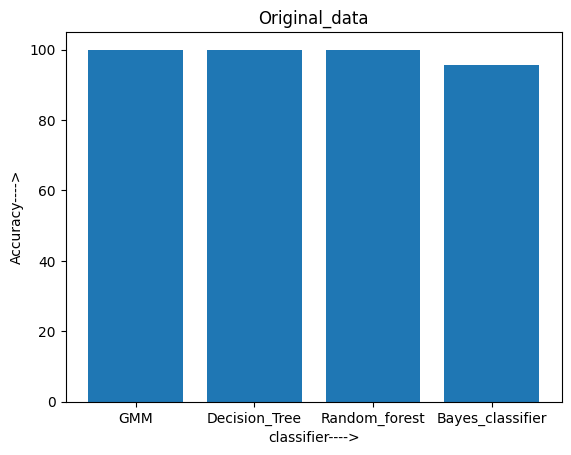

In [ ]:
count_one = pure_data_pred.count(1)
count_zero = pure_data_pred.count(0)

# Decision based on the count
if count_one > count_zero:
    print("Prediction for Pure Data :Fire alarm should ring!")
else:
    print("Prediction for Pure Data :Fire alarm should not ring.")
a = ['GMM', 'Decision_Tree', 'Random_forest', 'Bayes_classifier']
  # Adjust the length of pure_data if necessary
plt.bar(a, pure_data)
plt.title("Original_data")
plt.xlabel("classifier---->")
plt.ylabel("Accuracy---->")
plt.show()

Prediction for Standardised Data :Fire alarm should ring!


Text(0, 0.5, 'Accuracy---->')

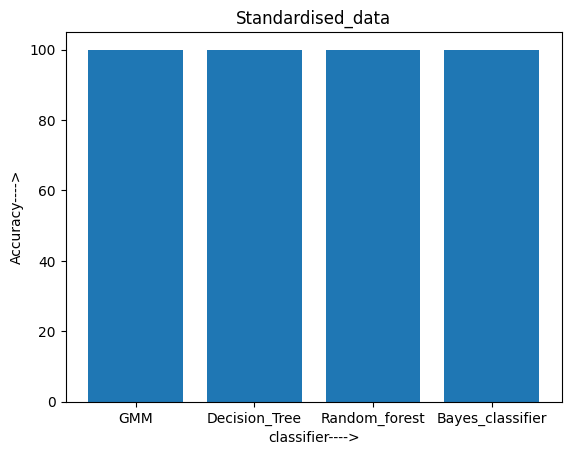

In [ ]:
count_one = standardised_data_pred.count(1)
count_zero = standardised_data_pred.count(0)

# Decision based on the count
if count_one > count_zero:
    print("Prediction for Standardised Data :Fire alarm should ring!")
else:
    print("Prediction for Standardised  Data :Fire alarm should not ring.")
a=['GMM','Decision_Tree','Random_forest','Bayes_classifier']
plt.bar(a,standardised_data)
plt.title("Standardised_data")
plt.xlabel("classifier---->")
plt.ylabel("Accuracy---->")

Prediction for Normalized Data: Fire alarm should ring!


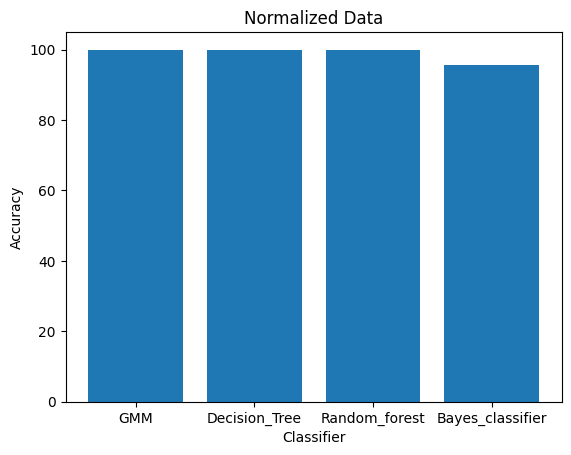

In [ ]:
count_one = normalised_data_pred.count(1)
count_zero = normalised_data_pred.count(0)

# Decision based on the count
if count_one > count_zero:
    print("Prediction for Normalized Data: Fire alarm should ring!")
else:
    print("Prediction for Normalized Data: Fire alarm should not ring.")

# Ensure `normalised_data` and `a` have the same length
a = ['GMM', 'Decision_Tree', 'Random_forest', 'Bayes_classifier']


plt.bar(a, normalised_data)
plt.title("Normalized Data")
plt.xlabel("Classifier")
plt.ylabel("Accuracy")
plt.show()
